In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, stats
import sklearn.preprocessing

import env
import wrangle as w
import explore as ex

In [2]:
# cleaning data
df = w.get_data()


In [3]:
df = w.clean_zillow()

697 outliers removed from property_value.
792 outliers removed from area.
658 outliers removed from bathrooms.
469 outliers removed from bedroom.
0 outliers removed from pool.
25 outliers removed from year.
0 outliers removed from full_bath.

Total of 2641 outliers removed.


In [4]:
df[["pool"]].value_counts()

pool
0.0     40091
1.0      9588
dtype: int64

In [5]:
# splitting data
train, validate, test = w.split_data(df)

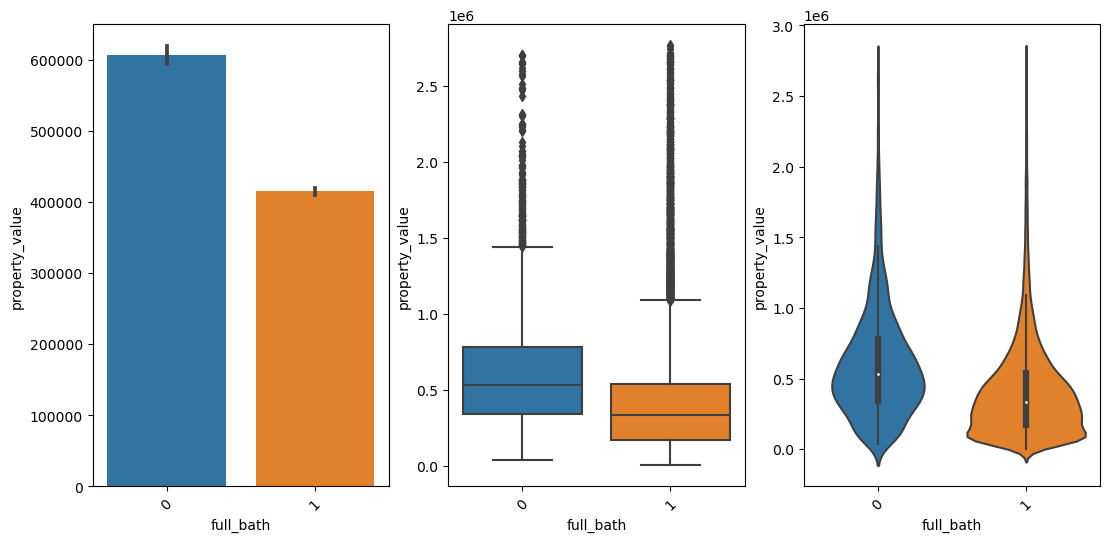

In [8]:
ex.plot_categorical_and_continuous_vars(train, "full_bath", "property_value")

In [9]:
r, p_value = spearmanr(train.bedroom, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.23855934893374325
P-value: 0.0


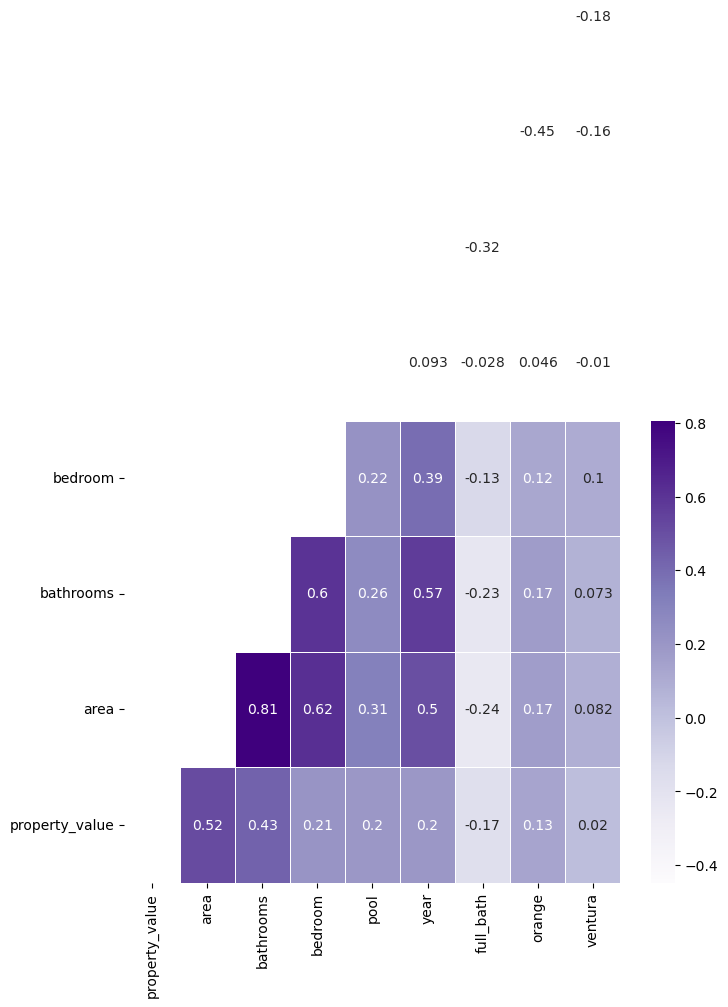

In [10]:
train_corr = train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.tril(train_corr))
plt.ylim(0, 4)

plt.show()

## Question: Is having 1 bathroom worse for property value than having 2 bedrooms?

* $H_0$: mean of property value for 1 bathroom homes <= mean of property value for 2 bedroom homes
* $H_a$: mean of property value for 1 bathroom homes > mean of property value for 2 bedroom homes

In [13]:
alpha = 0.05

In [14]:
avg_one_bath =  train[train.bathrooms == 1].property_value
avg_two_bed = train[train.bedroom == 2].property_value

<AxesSubplot:>

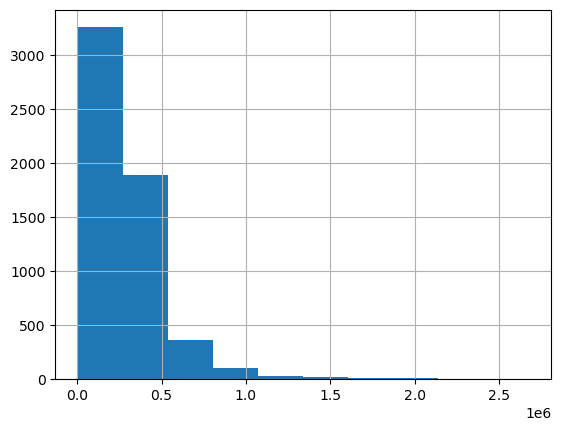

In [15]:
avg_one_bath.hist()

<AxesSubplot:>

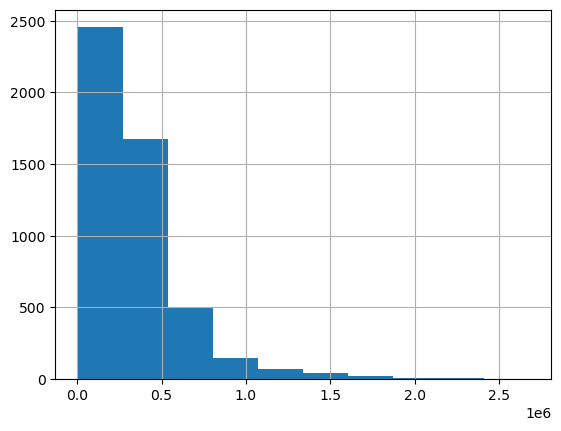

In [16]:
avg_two_bed.hist()

In [17]:
# variances not equal 
print(avg_one_bath.var(), avg_two_bed.var())

56870625271.26427 89180022175.49887


In [18]:
t, p = stats.ttest_ind(avg_one_bath, avg_two_bed, equal_var=False)
t, p / 2


(-11.577209082018319, 4.345903650413748e-31)

In [19]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [20]:
# We failed the reject the null hypothesis, having 1 bathroom is worse for property value than having 2 bedrooms.

## Question: Does having a half bath better for property value than a full bath ?

In [36]:
avg_full_bath  = train[train.full_bath == 1].property_value
avg_half_bath = train[train.full_bath == 0].property_value

* $H_0$: mean of property value for homes that have half bathrooms <= mean of property value for homes with full bathrooms
* $H_a$: mean of property value for homes that have half bathrooms > mean of property value for homes with full bathrooms

<AxesSubplot:>

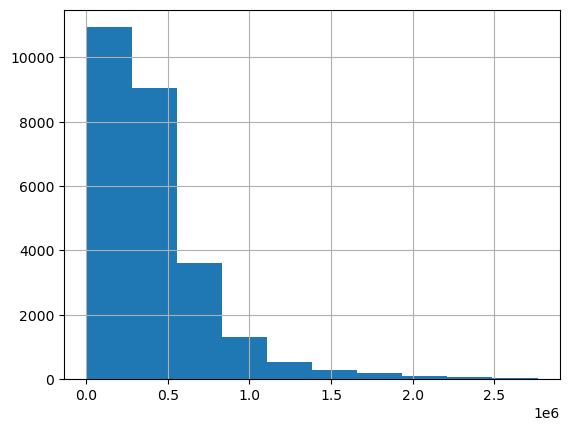

In [37]:
avg_full_bath.hist()

<AxesSubplot:>

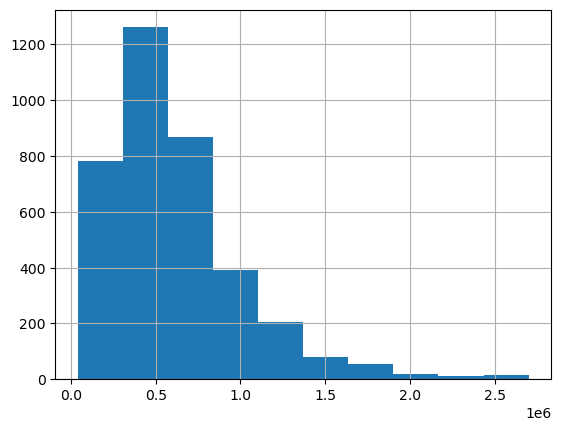

In [38]:
avg_half_bath.hist()

In [39]:
# variances not equal 
print(avg_full_bath.var(), avg_half_bath.var())

127534522107.89438 160156174213.9276


In [40]:
t, p = stats.ttest_ind(avg_half_bath, avg_full_bath, equal_var=False)
t, p / 2

(27.514713052987528, 1.3063529666343876e-154)

In [41]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [31]:
# We rejected the null hypothesis and homes that have half bathrooms have a greater property value than homes with only full bathrooms 

## Question: Does area  affect property value ?

In [ ]:
* $H_0$: There is no linear correlation between the area and property value.
* $H_a$: There is a linear correlation between the area and property value.

In [ ]:
corr, p = stats.pearsonr(train.area, train.property_value)
corr, p

## Question: is the average area for properties in orange county greater than the over average area?

* $H_0$: Mean of property value for homes in orange county <= mean of property value or homes in other counties
* $H_a$: Mean of property value for homes in orange county > mean of property value or homes in other counties

In [ ]:
orange_sample = train[train.fips == 'Orange'].property_value
overall_mean = train.property_value.mean()

In [ ]:
t4, p4 = stats.ttest_1samp(orange_sample, overall_mean)

In [ ]:
orange_sample

In [ ]:
if p4/2 > alpha:
    print("We fail to reject Null Hypothesis")
elif t4 < 0:
    print("We fail to reject Hypothesis")
else:
    print("We reject Hypothesis")


In [ ]:
# The null hypothesis is rejected homes in orange county have a higher property value than homes in other counties

In [ ]:
train.col

In [42]:
ex.create_relplot(train, "year", "property_value", "title")

TypeError: create_relplot() takes 3 positional arguments but 4 were given

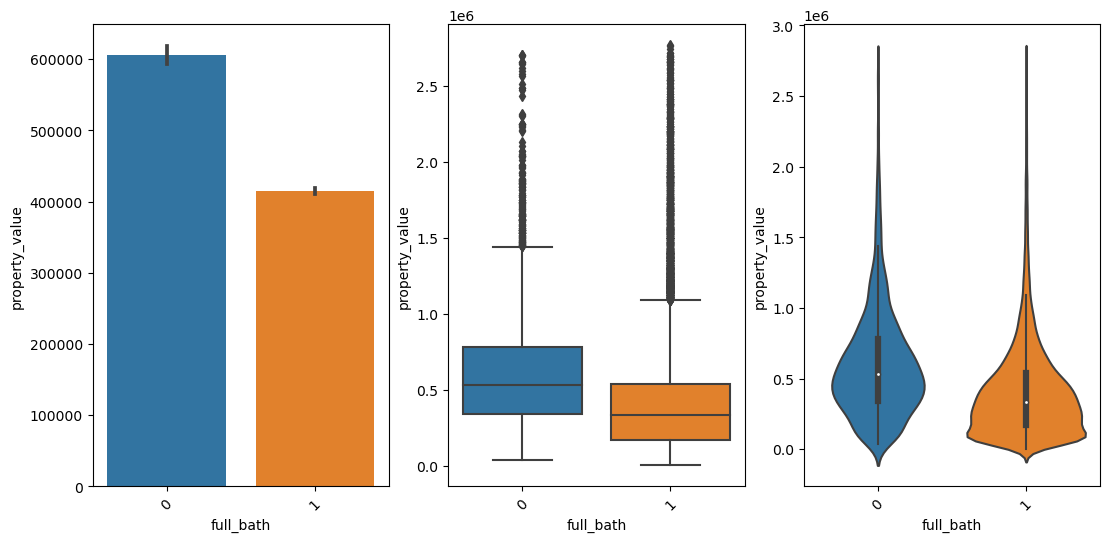

In [43]:
ex.plot_categorical_and_continuous_vars(train, "full_bath", "property_value" )

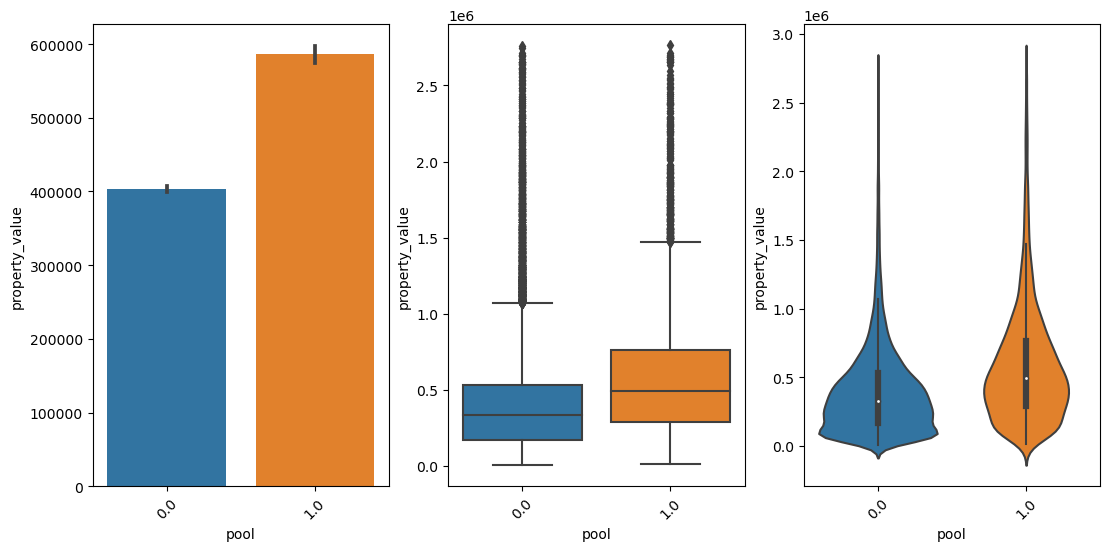

In [44]:
ex.plot_categorical_and_continuous_vars(train, "pool", "property_value" )

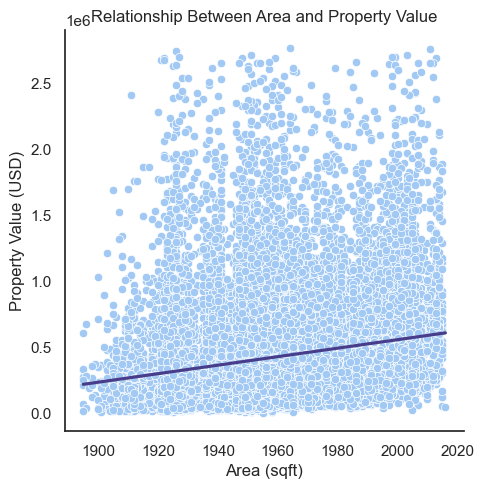

In [45]:
ex.create_relplot(train, "year", "property_value")

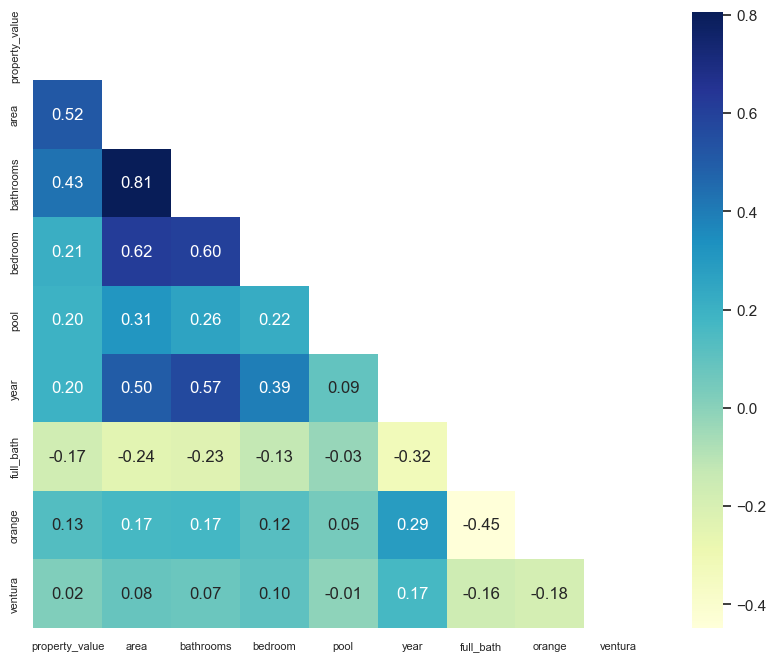

In [46]:
ex.train_heat(train)

In [47]:
# correlations

# pool correlation with property value
$H_0$: There is no linear correlation between the pool and property value.

$H_a$: There is a linear correlation between the pool and property value.

In [51]:
corr, p = stats.pearsonr(train.pool, train.property_value)
corr, p

(0.19662706870864655, 1.5157764395904291e-257)

# bedrooms correlation with property value
$H_0$: There is no linear correlation between the bedrooms and property value.

$H_a$: There is a linear correlation between the bedrooms and property value.

In [53]:
corr, p = stats.pearsonr(train.bedroom, train.property_value)
corr, p

(0.21332656287439294, 7.771882175758882e-304)

# bathrooms correlation with property value
$H_0$: There is no linear correlation between the bathrooms and property value.

$H_a$: There is a linear correlation between the bathrooms and property value.

In [54]:
corr, p = stats.pearsonr(train.bathrooms, train.property_value)
corr, p

(0.43335352233364144, 0.0)

# year correlation with property value
$H_0$: There is no linear correlation between the year and property value.

$H_a$: There is a linear correlation between the year and property value.

In [60]:
corr, p = stats.pearsonr(train.year, train.property_value)
corr, p

(0.1964636721847134, 4.105805968788242e-257)

# Orange correlation with property value
$H_0$: There is no linear correlation between the orange and property value.

$H_a$: There is a linear correlation between the orange and property value.

In [62]:
corr, p = stats.pearsonr(train.orange, train.property_value)
corr, p

(0.1322705649272739, 2.032839095746049e-116)

# Ventura correlation with property value
$H_0$: There is no linear correlation between the ventura and property value.

$H_a$: There is a linear correlation between the ventura and property value.

In [63]:
corr, p = stats.pearsonr(train.ventura, train.property_value)
corr, p

(0.0203386708427458, 0.000445372212506604)